<a href="https://colab.research.google.com/github/para662/dataviz2025/blob/main/visualize_data_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# การแสดงผลการกระจายของข้อมูล

In [12]:
import pandas as pd
from matplotlib import pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
path_to_stopandsearch = '/content/drive/MyDrive/data/2025-01/2025-01-bedfordshire-stop-and-search.csv'
stopandsearch_df = pd.read_csv(path_to_stopandsearch)
stopandsearch_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Female,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


แปลงค่า Gender และ Age range เป็นจำนวนจริง

In [15]:
stopandsearch_df.groupby('Gender').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Gender,,,,,,,,,,,,,,
Female,40,40,40,0,34,34,40,39,37,40,40,40,10,40
Male,287,287,287,0,240,240,278,280,276,287,287,287,107,287


In [16]:
stopandsearch_df.groupby('Age range').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Age range,,,,,,,,,,,,,,
10-17,45,45,45,0,39,39,43,42,42,45,45,45,17,45
18-24,99,99,99,0,84,84,84,96,97,99,99,99,41,99
25-34,80,80,80,0,63,63,71,79,75,80,80,80,32,80
over 34,126,126,126,0,104,104,119,122,122,126,126,126,40,126
under 10,1,1,1,0,1,1,1,1,1,1,1,1,0,1


In [17]:
stopandsearch_df.shape

(387, 15)

In [18]:
stopandsearch_df_dropna = stopandsearch_df.dropna(subset=['Age range','Gender'])

In [19]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'].replace({'under 10': 10, 'over 34': 34,
                                                                                     '25-34':30,'18-24':21,'10-17':14})

/tmp/ipython-input-3376285857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'].replace({'Female': 1, 'Male': 35})
/tmp/ipython-input-3376285857.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

### สร้าง list ของ ตัวเลข random number ที่เป็น normal distribution

In [20]:
import numpy as np
list_of_rn = np.random.normal(loc=1, scale=0.1, size=len(stopandsearch_df_dropna))

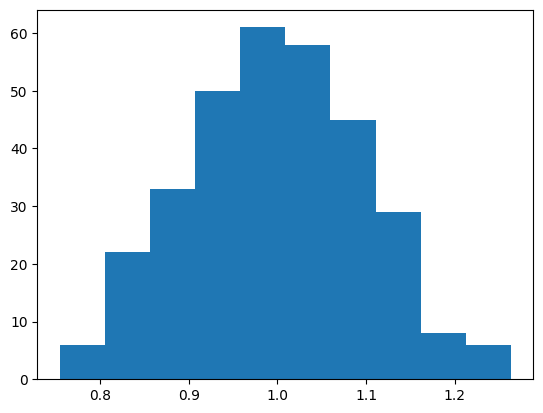

In [21]:
plt.hist(list_of_rn);

In [22]:
stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn

/tmp/ipython-input-864405060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Gender'] = stopandsearch_df_dropna['Gender'] * list_of_rn


In [23]:
stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))

/tmp/ipython-input-2945934892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stopandsearch_df_dropna['Age range'] = stopandsearch_df_dropna['Age range'] * np.random.normal(loc=1, scale=0.01, size=len(stopandsearch_df_dropna))


### ลบค่าที่เป็น outliers

In [24]:
stopandsearch_df_dropna = stopandsearch_df_dropna[(stopandsearch_df_dropna['Gender']>=0) & (stopandsearch_df_dropna['Gender']<40)]

In [25]:
stopandsearch_df_dropna.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2025-01-01T00:35:00+00:00,False,NaN,51.881481,-0.41311,31.546781,29.685556,Mixed/Multiple ethnic groups - Any other Mixed...,Other,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,False,False
1,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,30.597919,13.991841,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,39.187703,14.004668,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,1.125326,14.084266,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
4,Person search,2025-01-01T02:30:00+00:00,False,NaN,52.132059,-0.29660,37.765357,14.033986,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False


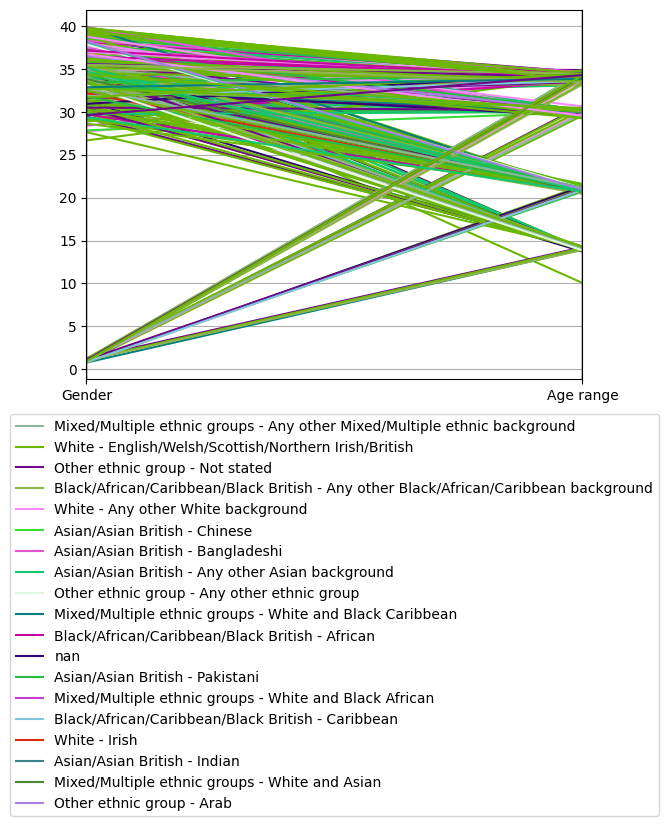

In [26]:
pd.plotting.parallel_coordinates(stopandsearch_df_dropna[['Gender','Age range','Self-defined ethnicity']],'Self-defined ethnicity')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -1.2))

## เปลี่ยนความโปร่งใสเพื่อดูข้อมูลที่ทับกัน

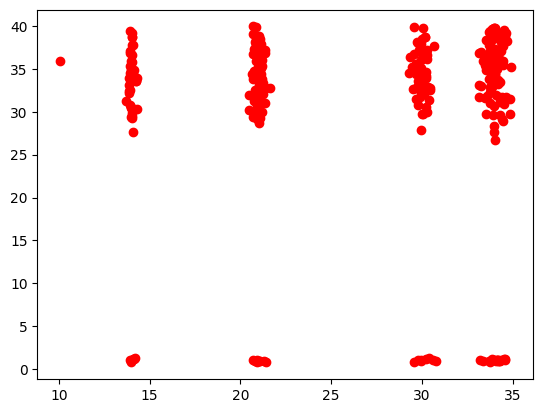

In [29]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'],c= 'r')

# Scatter plot

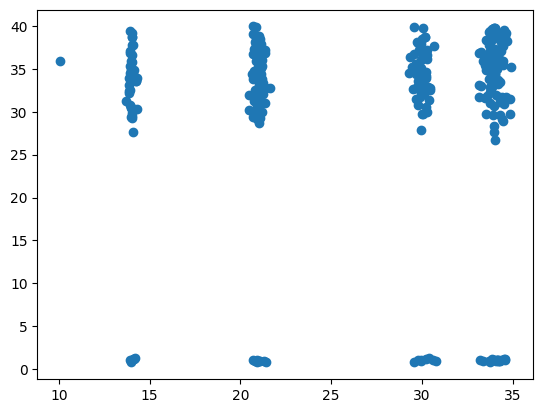

In [27]:
plt.scatter(stopandsearch_df_dropna['Age range'],stopandsearch_df_dropna['Gender'])

In [27]:
ตัวอย่าง column > Officer - de

In [30]:
stopandsearch_df_dropna.groupby('Officer-defined ethnicity').count()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
Officer-defined ethnicity,,,,,,,,,,,,,,
Asian,68,68,68,0,56,56,68,68,66,68,68,68,29,68
Black,47,47,47,0,38,38,47,47,47,47,47,47,20,47
Other,8,8,8,0,6,6,8,8,8,8,8,8,4,8
White,165,165,165,0,142,142,165,165,159,165,165,165,56,165


In [33]:
stopandsearch_df_dropna['Officer-defined ethnicity'] = stopandsearch_df_dropna['Officer-defined ethnicity'].copy().replace({'Asian' : 1, 'Black' : 0, 'White': 3, 'Other': 2})

## Scatter 2D

## scatter - default

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'])

### color

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c='r')

## ใส่สีให้แต่ละจุด

In [ ]:
set(df['Name']) #ดูว่ามีค่าอะไรบ้าง

In [ ]:
df2 = df.replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
df2

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'])

### alpha กำหนดความโปร่งแสง

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ใช้ขนาดของ marker แสดงค่าของ feature

In [ ]:
plt.scatter(df['PetalLength'],df['SepalLength'],s=50*df['PetalWidth'],c=df2['Name'],alpha=0.5)

## ตัวแปร Marker ใช้ในการเปลี่ยนหน้าตาของ marker

In [ ]:
plt.scatter(df['PetalLength'],df['PetalWidth'],s=100,c=df2['Name'],alpha=0.5,marker='*')

## การ plot กราฟหลายๆอันซ้อนกัน

In [ ]:
plt.scatter(df['PetalLength'][:50],df['PetalWidth'][:50],s=100,c='m',alpha=0.5,marker='$S$')
plt.scatter(df['PetalLength'][50:100],df['PetalWidth'][50:100],s=100,c='c',alpha=0.5,marker='$E$')
plt.scatter(df['PetalLength'][100:],df['PetalWidth'][100:],s=100,c='r',alpha=0.5,marker='$I$')

###Label-Legend

```plt.plot()``` input  ตัวที่ 3 คือ ตัวกำหนดหน้าตาของ marker

'หน้าตาmarker'-'ลักษณะของเส้นเชื่อมจุด'-'สี'

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5)

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o-r',alpha=0.5)

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'o:r',alpha=0.5)

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend()

### การใส่ชื่อกราฟ และชื่อแกน

In [ ]:
plt.plot(df['PetalLength'][:50],df['PetalWidth'][:50],'or',alpha=0.5,label='setosa')
plt.plot(df['PetalLength'][50:100],df['PetalWidth'][50:100],'xc',alpha=0.5,label='versicolor')
plt.plot(df['PetalLength'][100:],df['PetalWidth'][100:],'*m',alpha=0.5,label='virginica')
plt.legend(loc='lower right')
plt.title('Iris flower data distribution') ##ชื่อกราฟ
plt.xlabel('PetalLength') ##ชื่อแกน X
plt.ylabel('PetalWidth'); ##ชื่อแกน y

### 3D scatter

In [ ]:
ax = plt.axes(projection ="3d")
ax.scatter3D(df['PetalLength'],df['PetalWidth'],df['SepalWidth'],c=df2['Name'])

## Bubble Chart

Scatter plot ที่ใช้ขนาดของ marker ในการสื่อปริมาณของข้อมูล

In [ ]:
plt.scatter(df['PetalLength'][:50],df['SepalLength'][:50],s=150*df['PetalWidth'][100:],c='r',alpha=0.5)

### Example

### Box-plot

In [ ]:
df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
df.head()

In [ ]:
O = plt.boxplot(df['SepalWidth'])

In [ ]:
O

In [ ]:
O['fliers']

In [ ]:
O['fliers'][0]

In [ ]:
dir(O['fliers'][0])

In [ ]:
O['fliers'][0].get_ydata()

In [ ]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True)

In [ ]:
O

In [ ]:
O = plt.boxplot(df['SepalWidth'],showmeans=True,meanline=True,vert=False)

# HW7 plot กราฟ แสดง การกระจายของข้อมูลใน india imdb และ มาพรีเซ็น เป็นกลุ่ม (2 กราฟ)